# Detect number of plate and chasis from vehicle registration

In [3]:
# import packages and
from google.cloud import vision
from google.oauth2 import service_account
import io
import re
import os


In [4]:
# set up service account key (authentication)
# to environment variable
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sturdy-quarter-361804-599639eb7da1.json"

More about authentication to the cloud Vision API:
- https://cloud.google.com/vision/product-search/docs/auth
- https://cloud.google.com/vision/docs/before-you-begin
- https://google-auth.readthedocs.io/en/master/reference/google.oauth2.service_account.html

In [3]:
# set variable path
# path of input image
PATH = "image_sample/stnk_pak_qwantes.jpeg"

In [4]:
def detect_text_stnk(path):
    """Detect text from vehicle registration."""
    # instantiates a client
    client = vision.ImageAnnotatorClient()
    # if service account can't set in to evironment variable
    # use setting below
    # credentials = service_account.Credentials.from_service_account_file("sturdy-quarter-361804-599639eb7da1.json")
    # client = vision.ImageAnnotationContext(credentials=credentials)

    # load the image file
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # perform text detection on the image file
    response = client.text_detection(
        image=image,
        image_context={"language_hints": ["id"]} # specify the language to avoid non latin characters
    )

    return response.text_annotations

In [5]:
# CHECK output response.text_annotations
texts = detect_text_stnk(path=PATH)
print(type(texts))
texts

<class 'proto.marshal.collections.repeated.RepeatedComposite'>


[locale: "id"
description: "NOMOR REGISTRASI : B 1279 PYB\nVEHICLE REGISTRATION NUMBER\nNAMA PEMILIK\nNAME OF OWNER\nALAMAT\nADDRESS\nMERK\nBRAND\nTYPE\nTYPE\nJENIS\nCATEGORY\nMODEL\nMODEL\nKEPOLISIAN NEGARA REPUBLIK INDONESIA\nINDONESIAN NATIONAL POLICE\nSURAT TANDA NOMOR KENDARAAN BERMOTOR\nTAHUN PEMBUATAN\nMANUFACTURE YEAR\nNOMOR MESIN\nENGINE NUMBER\nISI SILINDER/DAYA LISTRIK\nCYLINDER CAPACITY/ELECTRICAL POWER\nNOMOR RANGKA NIK/VIN:\nVEHICLE IDENTIFY NUMBER\n: QWANTES SOADUONS\nCAWANG III JL.KOL\n:\n:\n:\n:\n:\n2015\n01495\nWARNA\nTOYOTA\nCOLOR\nRUSH15S (F700REGMMP BAHAN BAKAR\nTYPE FUEL\nMHFE2CJ3JFK101770\nNo.: 19098515.0/\nPERPANJANGAN STNK\nNIK/TDP/KITAS/KITAP :\nID CARD NUMBER\nCOMPANY\nMOBIL PENUMPANG WARNA TNKB\nLISENCE PLATE COLOR\nMICRO/MINIBUS TAHUN REGISTRASI\n3SZDFM5827\nX4\nSUTOMOTT6/6 JT\nNOMOR BPKB\nVEHICLE OWNERSHIP DOCUMENT NUMBER\nKODE LOKASI\nLOCATION CODE\nNO URUT PENDAFTARAN\nYOUR DABRAT\nPETRO\nANRAPOLDA TA 11 AGT 2020\nON BEHALF OF HEAD\nREGIONAL POLICE\nSILV

In [14]:
# CHECK first response text description
print(texts[0].description)

NOMOR REGISTRASI : B 1279 PYB
VEHICLE REGISTRATION NUMBER
NAMA PEMILIK
NAME OF OWNER
ALAMAT
ADDRESS
MERK
BRAND
TYPE
TYPE
JENIS
CATEGORY
MODEL
MODEL
KEPOLISIAN NEGARA REPUBLIK INDONESIA
INDONESIAN NATIONAL POLICE
SURAT TANDA NOMOR KENDARAAN BERMOTOR
TAHUN PEMBUATAN
MANUFACTURE YEAR
NOMOR MESIN
ENGINE NUMBER
ISI SILINDER/DAYA LISTRIK
CYLINDER CAPACITY/ELECTRICAL POWER
NOMOR RANGKA NIK/VIN:
VEHICLE IDENTIFY NUMBER
: QWANTES SOADUONS
CAWANG III JL.KOL
:
:
:
:
:
2015
01495
WARNA
TOYOTA
COLOR
RUSH15S (F700REGMMP BAHAN BAKAR
TYPE FUEL
MHFE2CJ3JFK101770
No.: 19098515.0/
PERPANJANGAN STNK
NIK/TDP/KITAS/KITAP :
ID CARD NUMBER
COMPANY
MOBIL PENUMPANG WARNA TNKB
LISENCE PLATE COLOR
MICRO/MINIBUS TAHUN REGISTRASI
3SZDFM5827
X4
SUTOMOTT6/6 JT
NOMOR BPKB
VEHICLE OWNERSHIP DOCUMENT NUMBER
KODE LOKASI
LOCATION CODE
NO URUT PENDAFTARAN
YOUR DABRAT
PETRO
ANRAPOLDA TA 11 AGT 2020
ON BEHALF OF HEAD
REGIONAL POLICE
SILVER METALIK
BENSIN
HITAM
2019
BERLAKU SAMPAI: 06-08-2025
DATE OF EXPIRE
MORS PURNOMO YOGO,

In [23]:
def clean_text(text):
       """Remove non alphanumeric chars."""
       # substitute non alphanumeric to a space
       non_alphanum_pattern = re.compile(r"[^a-zA-Z0-9\s]+")
       clean_text = non_alphanum_pattern.sub(" ", text)
       # clean double or more whitespace
       more_whitespace_pattern = re.compile(r"\s{2,}")
       clean_text = more_whitespace_pattern.sub(" ", clean_text)
       return clean_text

print(clean_text(texts[0].description))

NOMOR REGISTRASI B 1279 PYB
VEHICLE REGISTRATION NUMBER
NAMA PEMILIK
NAME OF OWNER
ALAMAT
ADDRESS
MERK
BRAND
TYPE
TYPE
JENIS
CATEGORY
MODEL
MODEL
KEPOLISIAN NEGARA REPUBLIK INDONESIA
INDONESIAN NATIONAL POLICE
SURAT TANDA NOMOR KENDARAAN BERMOTOR
TAHUN PEMBUATAN
MANUFACTURE YEAR
NOMOR MESIN
ENGINE NUMBER
ISI SILINDER DAYA LISTRIK
CYLINDER CAPACITY ELECTRICAL POWER
NOMOR RANGKA NIK VIN VEHICLE IDENTIFY NUMBER QWANTES SOADUONS
CAWANG III JL KOL 2015
01495
WARNA
TOYOTA
COLOR
RUSH15S F700REGMMP BAHAN BAKAR
TYPE FUEL
MHFE2CJ3JFK101770
No 19098515 0 PERPANJANGAN STNK
NIK TDP KITAS KITAP ID CARD NUMBER
COMPANY
MOBIL PENUMPANG WARNA TNKB
LISENCE PLATE COLOR
MICRO MINIBUS TAHUN REGISTRASI
3SZDFM5827
X4
SUTOMOTT6 6 JT
NOMOR BPKB
VEHICLE OWNERSHIP DOCUMENT NUMBER
KODE LOKASI
LOCATION CODE
NO URUT PENDAFTARAN
YOUR DABRAT
PETRO
ANRAPOLDA TA 11 AGT 2020
ON BEHALF OF HEAD
REGIONAL POLICE
SILVER METALIK
BENSIN
HITAM
2019
BERLAKU SAMPAI 06 08 2025
DATE OF EXPIRE
MORS PURNOMO YOGO YO
KOG POL MAP TOOTORN

In [24]:
def get_specify_text(response_text):
    """Get text of plate and chasis number,"""
    
    def clean_the_text(text):
       """Remove non alphanumeric chars."""
       # substitute non alphanumeric to a space
       non_alphanum_pattern = re.compile(r"[^a-zA-Z0-9\s]+")
       cleaned_text = non_alphanum_pattern.sub(" ", text)
       # clean double or more whitespace
       more_whitespace_pattern = re.compile(r"\s{2,}")
       cleaned_text = more_whitespace_pattern.sub(" ", cleaned_text)
       return cleaned_text

    def get_plate_number(text):
        """Get text of plate number"""
        pattern = re.compile(r"([A-Z]{1,2})\s?(\d{1,4})\s?([A-Z]{1,3})")
        plate_number = pattern.search(text)
        if plate_number is not None:
            return (
                plate_number.group(0), 
                plate_number.group(1), 
                plate_number.group(2), 
                plate_number.group(3)
            )
        else:
            return None

    def get_chasis_number(text):
        """Get text of chasis number"""
        pattern = re.compile(r"[\w\d]{10,12}([\d]{5})")
        chasis_number = pattern.search(text)
        if chasis_number is not None:
            return chasis_number.group(0), chasis_number.group(1)
        else:
            return None

    # Get first response text description 
    main_text = response_text[0].description 
    cleaned_text = clean_the_text(main_text)
    plate_number = get_plate_number(cleaned_text)
    chasis_number = get_chasis_number(cleaned_text)

    result_dictionary = {}
    if plate_number is not None:
        result_dictionary["plate_number"] = plate_number[0]
        result_dictionary["region_code"] = plate_number[1]
        result_dictionary["reg_number"] = plate_number[2]
        result_dictionary["letter_series"] = plate_number[3]
    else:
        result_dictionary["plate_number"] = "not found"
        result_dictionary["region_code"] = "not found"
        result_dictionary["reg_number"] = "not found"
        result_dictionary["letter_series"] = "not found"
    
    if chasis_number is not None:
        result_dictionary["chasis_number"] = chasis_number[0]
        result_dictionary["last_five"] = chasis_number[1]
    else:
        result_dictionary["chasis_number"] = "not found"
        result_dictionary["last_five"] = "not found"

    return result_dictionary

In [26]:
get_specify_text(texts)['plate_number']

'B 1279 PYB'

In [30]:
def detect_text_stnk(path):
    """Detect text from vehicle registration."""
    # instantiates a client
    client = vision.ImageAnnotatorClient()
    # if service account can't set in to evironment variable
    # use setting below
    # credentials = service_account.Credentials.from_service_account_file("sturdy-quarter-361804-599639eb7da1.json")
    # client = vision.ImageAnnotationContext(credentials=credentials)

    # load the image file
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # perform text detection on the image file
    response = client.text_detection(
        image=image,
        image_context={"language_hints": ["id"]} # specify the language to avoid non latin characters
    )

    def get_specify_text(response_text):
        """Get text of plate and chasis number,"""
        
        def clean_the_text(text):
            """Remove non alphanumeric chars."""
            # substitute non alphanumeric to a space
            non_alphanum_pattern = re.compile(r"[^a-zA-Z0-9\s]+")
            cleaned_text = non_alphanum_pattern.sub(" ", text)
            # clean double or more whitespace
            more_whitespace_pattern = re.compile(r"\s{2,}")
            cleaned_text = more_whitespace_pattern.sub(" ", cleaned_text)
            return cleaned_text

        def get_plate_number(text):
            """Get text of plate number"""
            pattern = re.compile(r"([A-Z]{1,2})\s?(\d{1,4})\s?([A-Z]{1,3})")
            plate_number = pattern.search(text)
            if plate_number is not None:
                return (
                    plate_number.group(0), 
                    plate_number.group(1), 
                    plate_number.group(2), 
                    plate_number.group(3)
                )
            else:
                return None

        def get_chasis_number(text):
            """Get text of chasis number"""
            pattern = re.compile(r"[\w\d]{10,12}([\d]{5})")
            chasis_number = pattern.search(text)
            if chasis_number is not None:
                return chasis_number.group(0), chasis_number.group(1)
            else:
                return None

        # Get first response text description 
        main_text = response_text[0].description 
        cleaned_text = clean_the_text(main_text)
        plate_number = get_plate_number(cleaned_text)
        chasis_number = get_chasis_number(cleaned_text)

        result_dictionary = {}
        if plate_number is not None:
            result_dictionary["plate_number"] = plate_number[0]
            result_dictionary["region_code"] = plate_number[1]
            result_dictionary["reg_number"] = plate_number[2]
            result_dictionary["letter_series"] = plate_number[3]
        else:
            result_dictionary["plate_number"] = "not found"
            result_dictionary["region_code"] = "not found"
            result_dictionary["reg_number"] = "not found"
            result_dictionary["letter_series"] = "not found"
        
        if chasis_number is not None:
            result_dictionary["chasis_number"] = chasis_number[0]
            result_dictionary["last_five"] = chasis_number[1]
        else:
            result_dictionary["chasis_number"] = "not found"
            result_dictionary["last_five"] = "not found"

        return result_dictionary

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    else:
        return get_specify_text(response.text_annotations)

In [31]:
detect_text_stnk(path=PATH)

{'plate_number': 'B 1279 PYB',
 'region_code': 'B',
 'reg_number': '1279',
 'letter_series': 'PYB',
 'chasis_number': 'MHFE2CJ3JFK101770',
 'last_five': '01770'}

Ada tiga tahap utama:
1. Set up *authentication* Google Cloud Vision API.
    ```
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sturdy-quarter-361804-599639eb7da1.json"
    ```  
    atau  
    ```
    credentials = service_account.Credentials.from_service_account_file("sturdy-quarter-361804-599639eb7da1.json")
    client = vision.ImageAnnotationContext(credentials=credentials)
    ```

2. Muat gambar dan melakukan deteksi teks.
    ```
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # perform text detection on the image file
    response = client.text_detection(
        image=image,
        image_context={"language_hints": ["id"]} # specify the language to avoid non latin characters
    )

    ```

3. Melakukan *parsing* untuk mendapatkan teks yang diharapkan.
    ```
    def get_specify_text(response_text):
        """Get text of plate and chasis number,"""
        
        def clean_the_text(text):

        ...

    get_specify_text(response.text_annotations)
    ```

In [6]:
import cv2
import matplotlib.pyplot as plt

In [7]:
texts

[locale: "id"
description: "NOMOR REGISTRASI : B 1279 PYB\nVEHICLE REGISTRATION NUMBER\nNAMA PEMILIK\nNAME OF OWNER\nALAMAT\nADDRESS\nMERK\nBRAND\nTYPE\nTYPE\nJENIS\nCATEGORY\nMODEL\nMODEL\nKEPOLISIAN NEGARA REPUBLIK INDONESIA\nINDONESIAN NATIONAL POLICE\nSURAT TANDA NOMOR KENDARAAN BERMOTOR\nTAHUN PEMBUATAN\nMANUFACTURE YEAR\nNOMOR MESIN\nENGINE NUMBER\nISI SILINDER/DAYA LISTRIK\nCYLINDER CAPACITY/ELECTRICAL POWER\nNOMOR RANGKA NIK/VIN:\nVEHICLE IDENTIFY NUMBER\n: QWANTES SOADUONS\nCAWANG III JL.KOL\n:\n:\n:\n:\n:\n2015\n01495\nWARNA\nTOYOTA\nCOLOR\nRUSH15S (F700REGMMP BAHAN BAKAR\nTYPE FUEL\nMHFE2CJ3JFK101770\nNo.: 19098515.0/\nPERPANJANGAN STNK\nNIK/TDP/KITAS/KITAP :\nID CARD NUMBER\nCOMPANY\nMOBIL PENUMPANG WARNA TNKB\nLISENCE PLATE COLOR\nMICRO/MINIBUS TAHUN REGISTRASI\n3SZDFM5827\nX4\nSUTOMOTT6/6 JT\nNOMOR BPKB\nVEHICLE OWNERSHIP DOCUMENT NUMBER\nKODE LOKASI\nLOCATION CODE\nNO URUT PENDAFTARAN\nYOUR DABRAT\nPETRO\nANRAPOLDA TA 11 AGT 2020\nON BEHALF OF HEAD\nREGIONAL POLICE\nSILV

In [8]:
def draw_ocr_results(image, text, rect, color=(0, 255, 0)):
    (startX, startY, endX, endY) = rect
    cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
    cv2.putText(image, text, (startX, startY - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

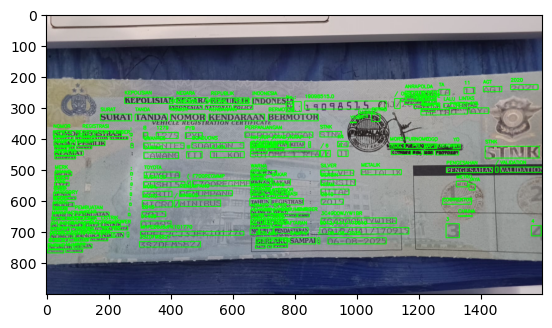

In [9]:
image = cv2.imread(PATH)
final = image.copy()

# for text in response.text_annotations[1::]:
for text in texts[1::]:
    ocr = text.description
    startX = text.bounding_poly.vertices[0].x
    startY = text.bounding_poly.vertices[0].y
    endX = text.bounding_poly.vertices[1].x
    endY = text.bounding_poly.vertices[2].y

    rect = (startX, startY, endX, endY)

    output = image.copy()
    output = draw_ocr_results(output, ocr, rect)
    final = draw_ocr_results(final, ocr, rect)

#     print(ocr)
#     cv2.imshow("Output", output)
#     cv2.waitKey()

# cv2.imshow("Final Output", final)
# cv2.waitKey(0)
plt.imshow(final)
plt.show()

    

Resources: https://cloud.google.com/vision/docs/ocr

In [1]:
def detect_text_plate(path):
    """Detect text from vehicle registration."""
    # instantiates a client
    client = vision.ImageAnnotatorClient()
    # if service account can't set in to evironment variable
    # use setting below
    # credentials = service_account.Credentials.from_service_account_file("sturdy-quarter-361804-599639eb7da1.json")
    # client = vision.ImageAnnotationContext(credentials=credentials)

    # load the image file
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # perform text detection on the image file
    response = client.text_detection(
        image=image,
        image_context={"language_hints": ["id"]} # specify the language to avoid non latin characters
    )

    def get_specify_text(response_text):
        """Get text of plate and chasis number,"""
        
        def clean_the_text(text):
            """Remove non alphanumeric chars."""
            # substitute non alphanumeric to a space
            non_alphanum_pattern = re.compile(r"[^a-zA-Z0-9\s]+")
            cleaned_text = non_alphanum_pattern.sub(" ", text)
            # clean double or more whitespace
            more_whitespace_pattern = re.compile(r"\s{2,}")
            cleaned_text = more_whitespace_pattern.sub(" ", cleaned_text)
            return cleaned_text

        def get_plate_number(text):
            """Get text of plate number"""
            pattern = re.compile(r"([A-Z]{1,2})\s?(\d{1,4})\s?([A-Z]{1,3})")
            plate_number = pattern.search(text)
            if plate_number is not None:
                return (
                    plate_number.group(0), 
                    plate_number.group(1), 
                    plate_number.group(2), 
                    plate_number.group(3)
                )
            else:
                return None

        # Get first response text description 
        main_text = response_text[0].description 
        cleaned_text = clean_the_text(main_text)
        plate_number = get_plate_number(cleaned_text)

        result_dictionary = {}
        if plate_number is not None:
            result_dictionary["plate_number"] = plate_number[0]
            result_dictionary["region_code"] = plate_number[1]
            result_dictionary["reg_number"] = plate_number[2]
            result_dictionary["letter_series"] = plate_number[3]
        else:
            result_dictionary["plate_number"] = "not found"
            result_dictionary["region_code"] = "not found"
            result_dictionary["reg_number"] = "not found"
            result_dictionary["letter_series"] = "not found"

        return result_dictionary

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    else:
        return get_specify_text(response.text_annotations)

In [5]:
def detect_text_ktp(path):
    """Detect text from vehicle registration."""
    # instantiates a client
    client = vision.ImageAnnotatorClient()
    # if service account can't set in to evironment variable
    # use setting below
    # credentials = service_account.Credentials.from_service_account_file("sturdy-quarter-361804-599639eb7da1.json")
    # client = vision.ImageAnnotationContext(credentials=credentials)

    # load the image file
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # perform text detection on the image file
    response = client.text_detection(
        image=image,
        image_context={"language_hints": ["id"]} # specify the language to avoid non latin characters
    )

    def get_specify_text(response_text):
        """Get text of plate and chasis number,"""
        
        def clean_the_text(text):
            """Remove non alphanumeric chars."""
            # substitute non alphanumeric to a space
            non_alphanum_pattern = re.compile(r"[^a-zA-Z0-9\s]+")
            cleaned_text = non_alphanum_pattern.sub(" ", text)
            # clean double or more whitespace
            more_whitespace_pattern = re.compile(r"\s{2,}")
            cleaned_text = more_whitespace_pattern.sub(" ", cleaned_text)
            return cleaned_text

        def get_id_number(text):
            """Get text of id number or Indonesian NIK"""
            pattern = re.compile(r"\d{16}")
            id_number = pattern.search(text)
            if id_number is not None:
                return id_number.group(0)
            else:
                return None

        # Get first response text description 
        main_text = response_text[0].description 
        cleaned_text = clean_the_text(main_text)
        id_number = get_id_number(cleaned_text)

        result_dictionary = {}
        if id_number is not None:
            result_dictionary["id_number"] = id_number
        else:
            result_dictionary["id_number"] = "not found"        

        return result_dictionary

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    else:
        return get_specify_text(response.text_annotations)

In [6]:
PATH = "image_sample/ktp3.jpeg"
detect_text_ktp(path=PATH)

{'id_number': '3510243006730004'}

In [7]:
PATH = "image_sample/plat2.jpg"
detect_text_plate(path=PATH)

{'plate_number': 'G 1023 XX',
 'region_code': 'G',
 'reg_number': '1023',
 'letter_series': 'XX'}

https://stackoverflow.com/questions/47924385/how-to-improve-ocr-results-with-google-vision-api-and-python